In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_classes=2, n_features=100, n_informative=75, n_redundant=25, n_clusters_per_class=1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)

(750, 100) (250, 100)


In [14]:
iterations = 1500

In [15]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=iterations)
log_model.fit(X_train, y_train)
log_model.score(X_test, y_test)

0.932

100%|██████████| 1500/1500 [00:20<00:00, 73.69it/s]


0.932

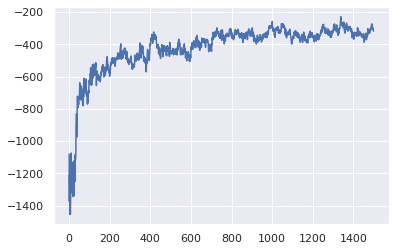

In [16]:
from algorithms import SimpleESClassifier
from objectives import CrossEntropyObjective

es_model = SimpleESClassifier(objective=CrossEntropyObjective(), n_iter=iterations, random_state=0, sigma=0.05)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

100%|██████████| 1500/1500 [00:43<00:00, 34.41it/s]


0.928

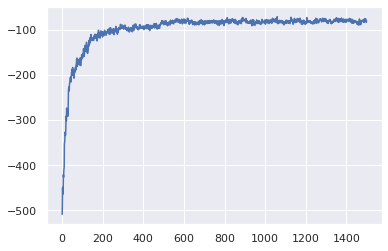

In [17]:
from algorithms import GeneticESClassifier

es_model = GeneticESClassifier(objective=CrossEntropyObjective(), n_iter=iterations, random_state=0, sigma=0.01)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

100%|██████████| 1500/1500 [00:34<00:00, 43.59it/s]


0.924

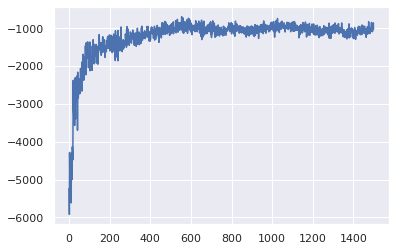

In [18]:
from algorithms import NaturalESClassifier

es_model = NaturalESClassifier(objective=CrossEntropyObjective(), n_iter=iterations, random_state=0)
es_model.fit(X_train, y_train)
plt.plot(range(iterations), es_model.history_)
es_model.score(X_test, y_test)

In [19]:
iterations = 5000

100%|██████████| 5000/5000 [00:48<00:00, 104.10it/s]


0.8

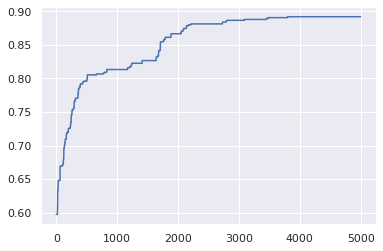

In [20]:
from algorithms import DifferentialEvolutionClassifier
from objectives import ScoreObjective

bounds = np.array([(-10, 110)] * (1 + X_train.shape[1]))

de_model = DifferentialEvolutionClassifier(objective=ScoreObjective(), n_iter=iterations, random_state=0, bounds=bounds)
de_model.fit(X_train, y_train)
plt.plot(range(iterations), de_model.history_)
de_model.score(X_test, y_test)